In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from pathlib import Path

# Set paths
DATA = Path('.')  # Folder where your CSVs are stored
OUT = Path('.')   # Output folder for saved files


In [4]:
# Load all Fitbit CSV datasets.

# DAILY DATA
daily_activity = pd.read_csv("/Users/shivalimuthukumar/Desktop/dailyActivity_merged.csv")
daily_calories = pd.read_csv("/Users/shivalimuthukumar/Desktop/dailyCalories_merged.csv")
daily_intensities = pd.read_csv("/Users/shivalimuthukumar/Desktop/dailyIntensities_merged.csv")
daily_steps = pd.read_csv("/Users/shivalimuthukumar/Desktop/dailySteps_merged.csv")
sleep_day = pd.read_csv("/Users/shivalimuthukumar/Desktop/sleepDay_merged.csv")
weight_log = pd.read_csv("/Users/shivalimuthukumar/Desktop/weightLogInfo_merged.csv")
heartrate = pd.read_csv("/Users/shivalimuthukumar/Desktop/heartrate_seconds_merged.csv")

# HOURLY DATA
hourly_calories = pd.read_csv("/Users/shivalimuthukumar/Desktop/hourlyCalories_merged.csv")
hourly_intensities = pd.read_csv("/Users/shivalimuthukumar/Desktop/hourlyIntensities_merged.csv")
hourly_steps = pd.read_csv("/Users/shivalimuthukumar/Desktop/hourlySteps_merged.csv")

# MINUTE-LEVEL DATA
minute_calories_narrow = pd.read_csv("/Users/shivalimuthukumar/Desktop/minuteCaloriesNarrow_merged.csv")
minute_calories_wide = pd.read_csv("/Users/shivalimuthukumar/Desktop/minuteCaloriesWide_merged.csv")
minute_steps_narrow = pd.read_csv("/Users/shivalimuthukumar/Desktop/minuteStepsNarrow_merged.csv")
minute_steps_wide = pd.read_csv("/Users/shivalimuthukumar/Desktop/minuteStepsWide_merged.csv")
minute_intensities_narrow = pd.read_csv("/Users/shivalimuthukumar/Desktop/minuteIntensitiesNarrow_merged.csv")
minute_intensities_wide = pd.read_csv("/Users/shivalimuthukumar/Desktop/minuteIntensitiesWide_merged.csv")
minute_mets_narrow = pd.read_csv("/Users/shivalimuthukumar/Desktop/minuteMETsNarrow_merged.csv")
minute_sleep = pd.read_csv("/Users/shivalimuthukumar/Desktop/minuteSleep_merged.csv")

print("All Fitbit CSVs loaded successfully!\n")

datasets = {
    "daily_activity": daily_activity,
    "daily_calories": daily_calories,
    "daily_intensities": daily_intensities,
    "daily_steps": daily_steps,
    "sleep_day": sleep_day,
    "weight_log": weight_log,
    "heartrate": heartrate,
    "hourly_calories": hourly_calories,
    "hourly_intensities": hourly_intensities,
    "hourly_steps": hourly_steps,
    "minute_calories_narrow": minute_calories_narrow,
    "minute_calories_wide": minute_calories_wide,
    "minute_steps_narrow": minute_steps_narrow,
    "minute_steps_wide": minute_steps_wide,
    "minute_intensities_narrow": minute_intensities_narrow,
    "minute_intensities_wide": minute_intensities_wide,
    "minute_mets_narrow": minute_mets_narrow,
    "minute_sleep": minute_sleep
}

for name, df in datasets.items():
    print(f"{name:30s} → {df.shape[0]:6d} rows × {df.shape[1]:3d} columns")


All Fitbit CSVs loaded successfully!

daily_activity                 →    940 rows ×  15 columns
daily_calories                 →    940 rows ×   3 columns
daily_intensities              →    940 rows ×  10 columns
daily_steps                    →    940 rows ×   3 columns
sleep_day                      →    413 rows ×   5 columns
weight_log                     →     67 rows ×   8 columns
heartrate                      → 2483658 rows ×   3 columns
hourly_calories                →  22099 rows ×   3 columns
hourly_intensities             →  22099 rows ×   4 columns
hourly_steps                   →  22099 rows ×   3 columns
minute_calories_narrow         → 1325580 rows ×   3 columns
minute_calories_wide           →  21645 rows ×  62 columns
minute_steps_narrow            → 1325580 rows ×   3 columns
minute_steps_wide              →  21645 rows ×  62 columns
minute_intensities_narrow      → 1325580 rows ×   3 columns
minute_intensities_wide        →  21645 rows ×  62 columns
minute_mets_na

In [24]:
# Merge and clean Fitbit datasets (main daily, sleep, and weight)

print("a. Format date columns consistently\n")

print("Daily activity columns:", daily_activity.columns.tolist())
print("\nSleep day columns:", sleep_day.columns.tolist())
print("\nWeight log columns:", weight_log.columns.tolist())

# Convert date columns (automatically uses 2nd column for sleep_day & weight_log)

daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], errors="coerce")
sleep_day[list(sleep_day.columns)[1]] = pd.to_datetime(sleep_day[list(sleep_day.columns)[1]], errors="coerce")
weight_log[list(weight_log.columns)[1]] = pd.to_datetime(weight_log[list(weight_log.columns)[1]], errors="coerce")

print("\nAll date columns formatted successfully!\n")

a. Format date columns consistently

Daily activity columns: ['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']

Sleep day columns: ['Id', 'ActivityDate', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']

Weight log columns: ['Id', 'ActivityDate', 'WeightKg', 'WeightPounds', 'Fat', 'BMI', 'IsManualReport', 'LogId']

All date columns formatted successfully!



In [25]:
print("b. Merge datasets\n")
print("Step 1: Start with daily activity (base dataset)\n")
merged_df = daily_activity.copy()

print("Step 2: Add sleep data\n")
sleep_day = sleep_day.rename(columns={"SleepDay": "ActivityDate"})
merged_df = pd.merge(merged_df, sleep_day, on=["Id", "ActivityDate"], how="left")

print("Step 3: Add weight log data\n")
weight_log = weight_log.rename(columns={"Date": "ActivityDate"})
merged_df = pd.merge(merged_df, weight_log, on=["Id", "ActivityDate"], how="left")

b. Merge datasets

Step 1: Start with daily activity (base dataset)

Step 2: Add sleep data

Step 3: Add weight log data



In [27]:
print("c. Clean the merged dataset\n")

merged_df.drop_duplicates(inplace=True)
merged_df.reset_index(drop=True, inplace=True)
print("Merged Dataset has been cleaned successfully!")

c. Clean the merged dataset

Merged Dataset has been cleaned successfully!


In [28]:
print("d. Handle missing values\n")

# Fill missing numeric columns with 0 (only if needed)
numeric_cols = merged_df.select_dtypes(include="number").columns
merged_df[numeric_cols] = merged_df[numeric_cols].fillna(0)
print("Missing values have been handled successfully!")

d. Handle missing values

Missing values have been handled successfully!


In [29]:
print("e. Sort by Id and date\n")

merged_df = merged_df.sort_values(by=["Id", "ActivityDate"])
print("Merged dataset has been sirted by ID and Date!")

e. Sort by Id and date

Merged dataset has been sirted by ID and Date!


In [30]:
print("f. Save the cleaned dataset\n")

output_path = "/Users/shivalimuthukumar/Desktop/cleaned_final_merged.csv"
merged_df.to_csv(output_path, index=False)

print("Cleaned dataset saved successfully to:\n", (output_path))
print("\nTotal Rows:", (merged_df.shape[0]))
print("\nTotal Columns:", (merged_df.shape[1]))

f. Save the cleaned dataset

Cleaned dataset saved successfully to:
 /Users/shivalimuthukumar/Desktop/cleaned_final_merged.csv

Total Rows: 940

Total Columns: 24


In [31]:
print("\ng. Quick check\n")

print("\nColumns in cleaned dataset:")
print(merged_df.columns.tolist())

print("\nSample data preview:")
print(merged_df.head())


g. Quick check


Columns in cleaned dataset:
['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed', 'WeightKg', 'WeightPounds', 'Fat', 'BMI', 'IsManualReport', 'LogId']

Sample data preview:
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162           8.50             8.50   
1  1503960366   2016-04-13       10735           6.97             6.97   
2  1503960366   2016-04-14       10460           6.74             6.74   
3  1503960366   2016-04-15        9762           6.28             6.28   
4  1503960366   2016-04-16       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  Moderat

In [32]:
# Load cleaned dataset
df = pd.read_csv("/Users/shivalimuthukumar/Desktop/cleaned_final_merged.csv")

# Convert date column to datetime again
df["ActivityDate"] = pd.to_datetime(df["ActivityDate"], errors="coerce")

# Set default Seaborn theme for clean visuals
sns.set(style="whitegrid", palette="pastel")

print("Dataset loaded successfully!")
print("\nTotal number of Rows:", (df.shape[0]))
print("\nTotal number of Columns:", (df.shape[1]))
df.head()


Dataset loaded successfully!

Total number of Rows: 940

Total number of Columns: 24


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,1985,1.0,327.0,346.0,0.0,0.0,0.0,0.0,NaN,0.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,1797,2.0,384.0,407.0,0.0,0.0,0.0,0.0,NaN,0.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,1776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,1745,1.0,412.0,442.0,0.0,0.0,0.0,0.0,NaN,0.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,1863,2.0,340.0,367.0,0.0,0.0,0.0,0.0,NaN,0.0


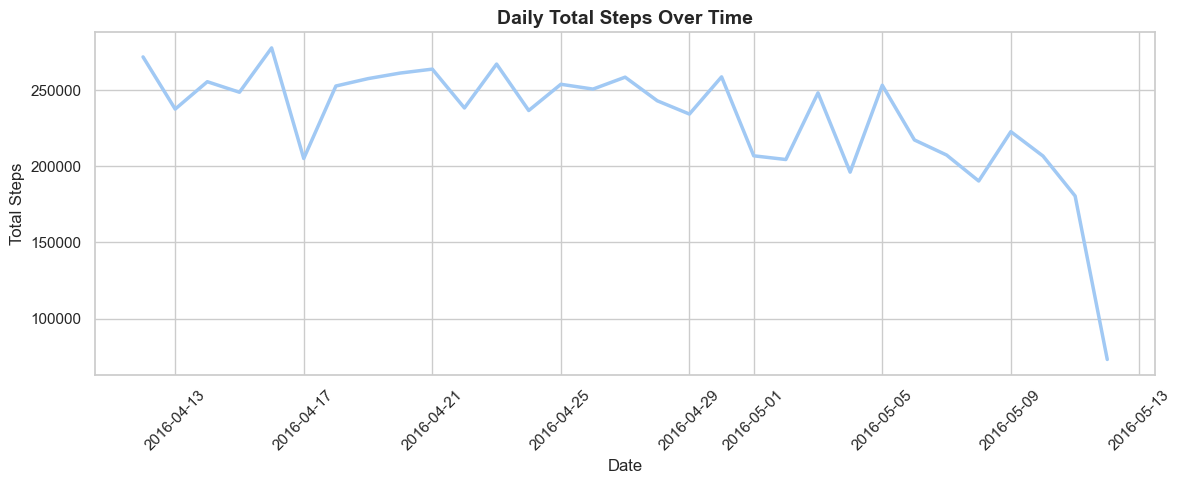

In [33]:
# 1. Daily Steps Over Time
steps_by_date = df.groupby("ActivityDate")["TotalSteps"].sum()

plt.figure(figsize=(12, 5))
plt.plot(steps_by_date.index, steps_by_date.values, linewidth=2.5)
plt.title("Daily Total Steps Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Total Steps")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

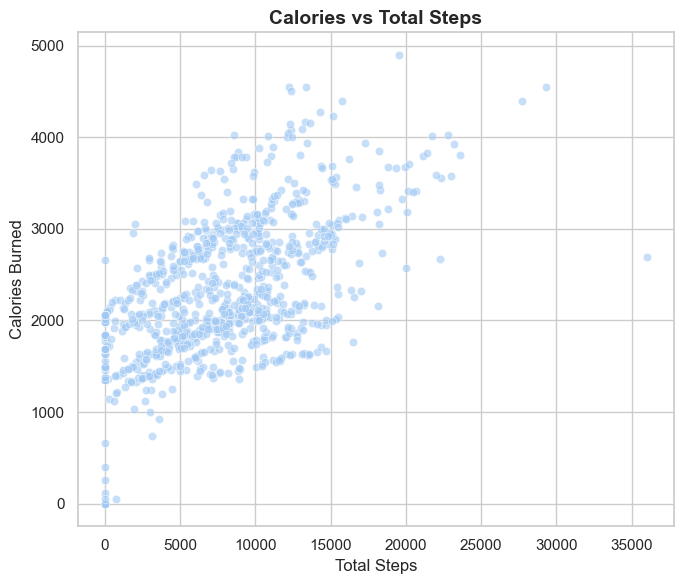

In [34]:
# 2. Calories vs Steps (Scatter Plot)
plt.figure(figsize=(7, 6))
sns.scatterplot(x="TotalSteps", y="Calories", data=df, alpha=0.6)
plt.title("Calories vs Total Steps", fontsize=14, fontweight="bold")
plt.xlabel("Total Steps")
plt.ylabel("Calories Burned")
plt.tight_layout()
plt.show()

/Users/shivalimuthukumar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


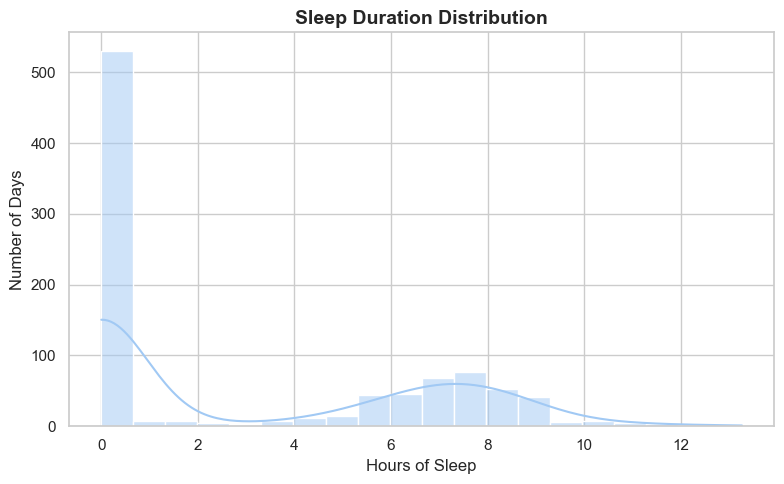

In [35]:
# 3. Sleep Duration Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["TotalMinutesAsleep"] / 60, bins=20, kde=True)
plt.title("Sleep Duration Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Hours of Sleep")
plt.ylabel("Number of Days")
plt.tight_layout()
plt.show()

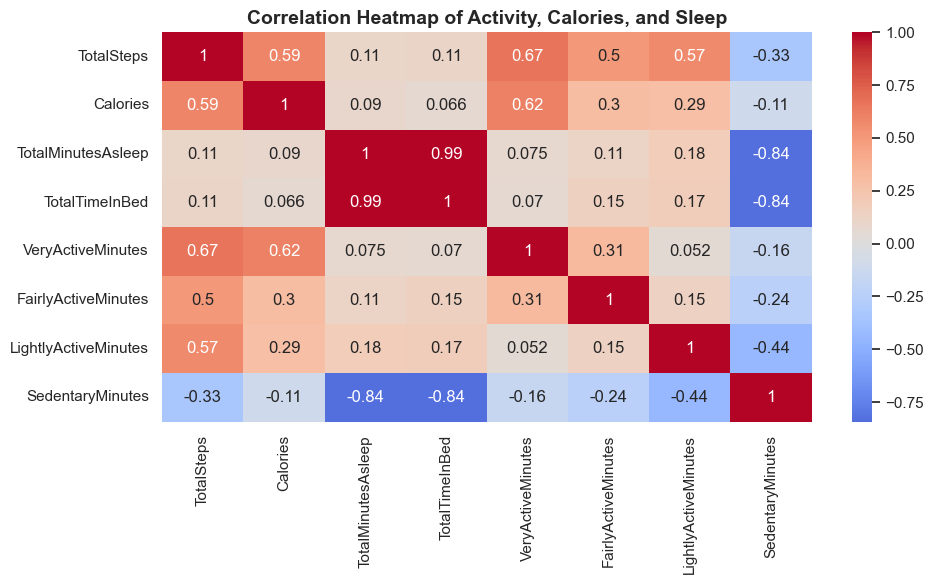

In [36]:
# 4. Correlation Heatmap
plt.figure(figsize=(10, 6))
numeric_cols = ["TotalSteps", "Calories", "TotalMinutesAsleep", "TotalTimeInBed", 
                "VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes"]
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Activity, Calories, and Sleep", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

In [38]:
print("Insights Summary:\n")
print("1. Steps and Calories have a strong positive relationship.\n")
print("2. Most users average between 6–8 hours of sleep per night.\n")
print("3. Activity levels fluctuate daily, indicating inconsistent routines.\n")
print("4. Sedentary minutes show an inverse relationship with calories burned.")

Insights Summary:

1. Steps and Calories have a strong positive relationship.

2. Most users average between 6–8 hours of sleep per night.

3. Activity levels fluctuate daily, indicating inconsistent routines.

4. Sedentary minutes show an inverse relationship with calories burned.
